In [1]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from numpy import sqrt 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from xgboost import XGBRegressor


C:\Users\chiuk\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
!pip install pycaret --quiet --user

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.0.3 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.0.1 which is incompatible.


In [3]:
# pip install xgboost

### Read in Data

In [11]:
df = pd.read_csv('oasis_cross-sectional.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [12]:
#Drop delay column
df = df.drop(['Delay'], axis =1 )
df = df.dropna()
#Make into String
df.CDR = df.CDR.map(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 415
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      216 non-null    object 
 1   M/F     216 non-null    object 
 2   Hand    216 non-null    object 
 3   Age     216 non-null    int64  
 4   Educ    216 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    216 non-null    float64
 7   CDR     216 non-null    object 
 8   eTIV    216 non-null    int64  
 9   nWBV    216 non-null    float64
 10  ASF     216 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 20.2+ KB


### Break down CDR into Dichotomous Groups (CDR = 0,and CDR > 0)

In [13]:
df['CDR'] = pd.to_numeric(df['CDR'], errors = 'coerce')
df['CDR'] = df['CDR'].apply(lambda x: 0 if x == 0 else 1)
df['CDR']

0      0
1      0
2      1
8      0
9      0
      ..
411    1
412    1
413    0
414    0
415    0
Name: CDR, Length: 216, dtype: int64

### Visual Exploration - EDA

Correlation matrix

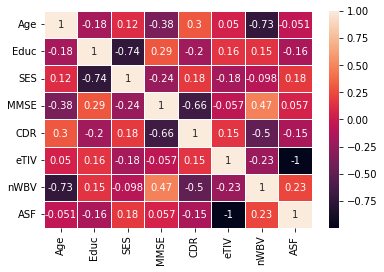

In [14]:
corr = df.corr(method='spearman')

# Customize the heatmap of the correlation matrix
sns.heatmap(corr,
           annot=True,
           linewidths=0.5,
           annot_kws={'size': 10});

plt.xticks(rotation=90);
plt.yticks(rotation=0);

Pairplot, coloured by CDR

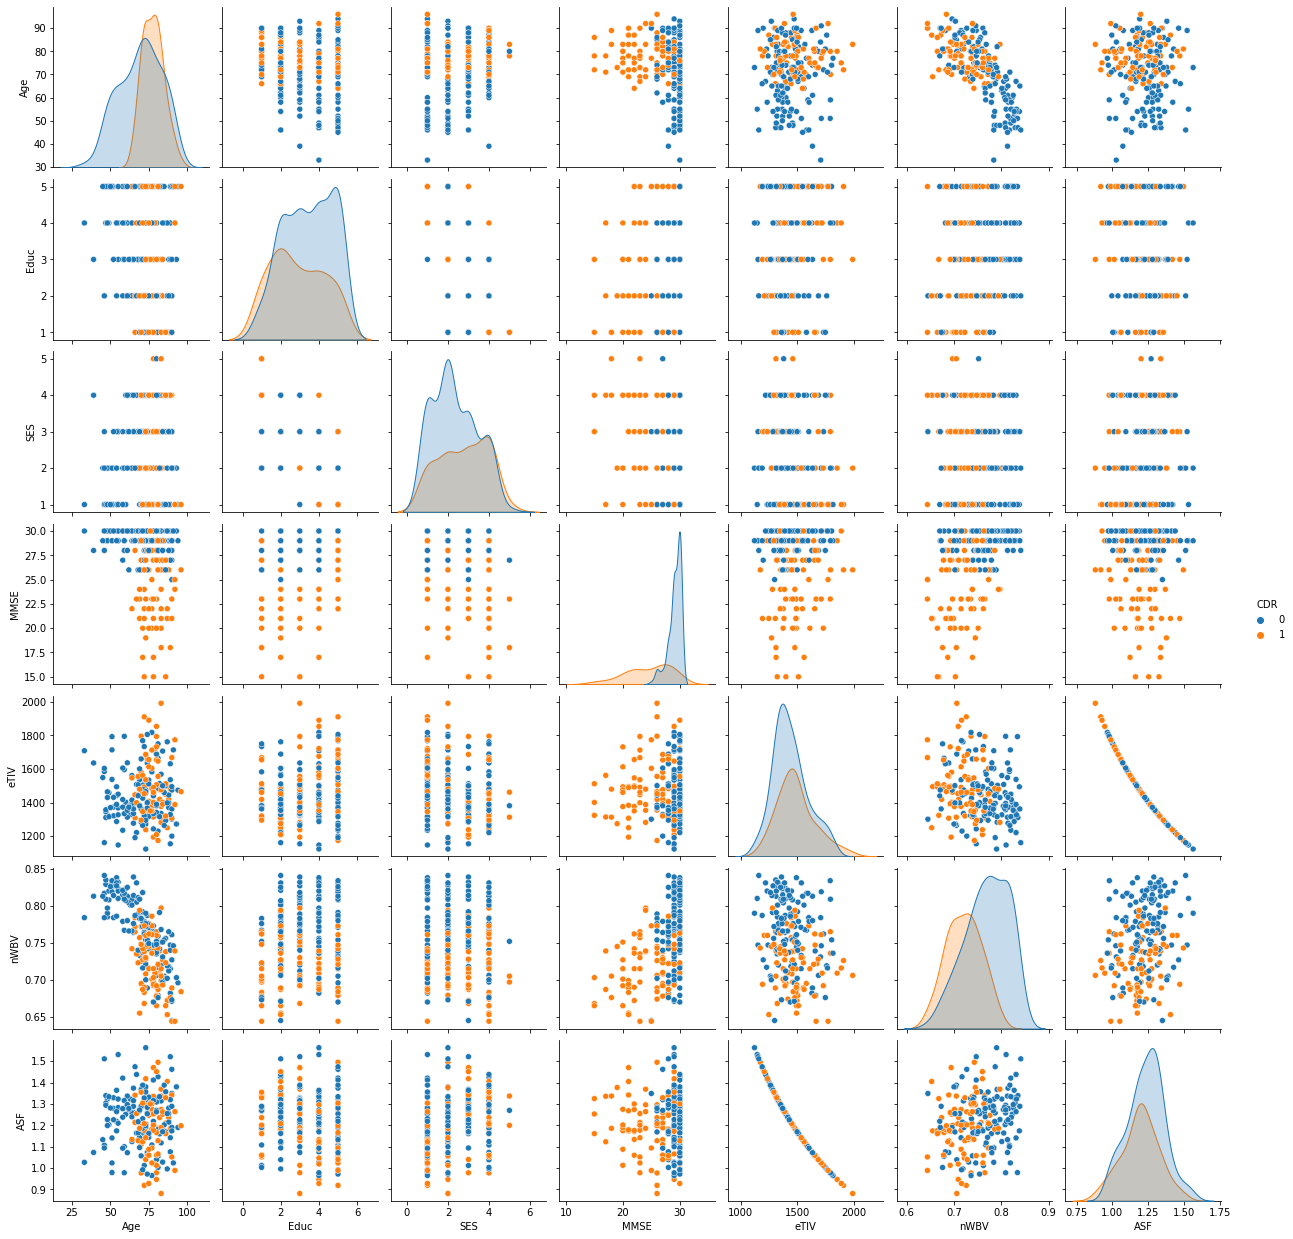

In [15]:
sns.pairplot(df, hue = 'CDR')

### Pycaret - Low Code Machine Learning for Multiclassification. 

Using this to explore what kind of models would be suitable. For Prelim Exploration.

In [16]:
#check the shape of data
df.shape

(216, 11)

In [17]:
data = df.sample(frac=0.85, random_state=1)
data_unseen = df.drop(data.index).reset_index(drop=True)
data = data.reset_index(drop = True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (184, 11)
Unseen Data For Predictions: (32, 11)


In [18]:
from pycaret.classification import *

C:\Users\chiuk\anaconda3\lib\site-packages\dask\dataframe\backends.py:187: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\chiuk\anaconda3\lib\site-packages\dask\dataframe\backends.py:187: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\chiuk\anaconda3\lib\site-packages\dask\dataframe\backends.py:187: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [19]:
exp_mclf101 = setup(data = data, target = 'CDR', 
                    ignore_features = ['ID'],
                    categorical_features= ['Educ', 'SES'],
                    session_id=123) 

,Description,Value
0,session_id,123
1,Target,CDR
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(184, 11)"
5,Missing Values,0
6,Numeric Features,5
7,Categorical Features,4
8,Ordinal Features,0
9,High Cardinality Features,0


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8359,0.8849,0.7500,0.8562,0.7714,0.6487,0.6777,0.0840
xgboost,Extreme Gradient Boosting,0.8199,0.8682,0.7300,0.8248,0.7570,0.6173,0.6355,0.1210
lightgbm,Light Gradient Boosting Machine,0.8192,0.8490,0.7500,0.8330,0.7622,0.6217,0.6493,0.2050
ada,Ada Boost Classifier,0.8135,0.8940,0.6900,0.8333,0.7411,0.5988,0.6144,0.0320
gbc,Gradient Boosting Classifier,0.8122,0.8811,0.7500,0.7975,0.7555,0.6050,0.6250,0.0350
ridge,Ridge Classifier,0.8115,0.0000,0.6533,0.8833,0.7201,0.5905,0.6270,0.0050
lda,Linear Discriminant Analysis,0.8109,0.8344,0.6533,0.8633,0.7202,0.5885,0.6172,0.0060
lr,Logistic Regression,0.7962,0.8633,0.6900,0.8038,0.7191,0.5657,0.5877,0.8830
nb,Naive Bayes,0.7885,0.8908,0.5933,0.8433,0.6719,0.5323,0.5650,0.0050
et,Extra Trees Classifier,0.7641,0.8627,0.6900,0.7331,0.6750,0.4989,0.5311,0.0790


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [21]:
model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6923,0.8750,0.8000,0.5714,0.6667,0.3953,0.4148
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.6923,0.8500,0.4000,0.6667,0.5000,0.2973,0.3175
3,0.9231,1.0000,1.0000,0.8333,0.9091,0.8434,0.8539
4,0.7692,0.8500,0.6000,0.7500,0.6667,0.4935,0.5007
5,0.8462,0.9000,0.8000,0.8000,0.8000,0.6750,0.6750
6,0.8462,0.6250,0.6000,1.0000,0.7500,0.6486,0.6928
7,0.6923,0.7619,0.5000,0.7500,0.6000,0.3659,0.3858
8,0.7500,0.9429,0.8000,0.6667,0.7273,0.5000,0.5071
9,0.7500,0.8286,0.4000,1.0000,0.5714,0.4375,0.5292


In [22]:
tuned= tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7692,0.8500,0.8000,0.6667,0.7273,0.5301,0.5367
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7692,1.0000,0.4000,1.0000,0.5714,0.4507,0.5394
3,0.9231,1.0000,1.0000,0.8333,0.9091,0.8434,0.8539
4,0.8462,0.8000,0.6000,1.0000,0.7500,0.6486,0.6928
5,0.9231,0.9750,0.8000,1.0000,0.8889,0.8312,0.8433
6,0.7692,0.7250,0.6000,0.7500,0.6667,0.4935,0.5007
7,0.6923,0.8333,0.5000,0.7500,0.6000,0.3659,0.3858
8,0.7500,0.8857,0.8000,0.6667,0.7273,0.5000,0.5071
9,0.7500,0.9143,0.4000,1.0000,0.5714,0.4375,0.5292


In [23]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned)

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


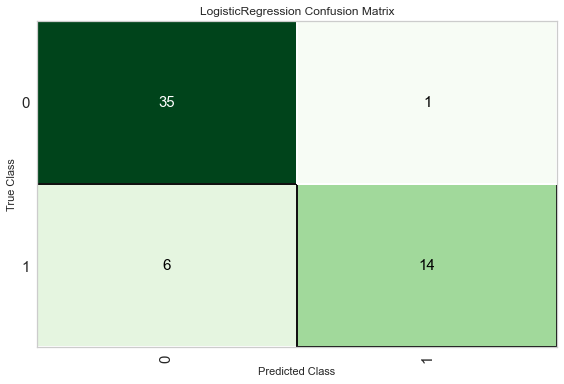

In [24]:
plot_model(tuned, plot = 'confusion_matrix')

In [25]:
predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8750,0.9139,0.7000,0.9333,0.8000,0.7118,0.7273


,Age,MMSE,eTIV,nWBV,ASF,M/F_M,Hand_R,Educ_1.0,Educ_2.0,Educ_3.0,Educ_4.0,Educ_5.0,SES_1.0,SES_2.0,SES_3.0,SES_4.0,SES_5.0,CDR,Label,Score
0,84.0,28.0,1483.0,0.697,1.183,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5884
1,58.0,30.0,1235.0,0.820,1.421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9609
2,88.0,26.0,1419.0,0.674,1.236,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.6646
3,75.0,30.0,1317.0,0.742,1.332,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9242
4,93.0,30.0,1272.0,0.703,1.380,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8863
5,71.0,29.0,1264.0,0.818,1.388,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8807
6,81.0,30.0,1664.0,0.679,1.055,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.7554
7,80.0,29.0,1209.0,0.760,1.451,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.8788
8,70.0,29.0,1295.0,0.748,1.355,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.8767
9,61.0,30.0,1313.0,0.813,1.337,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9427


In [26]:
finalmodel = finalize_model(tuned)

In [27]:
unseen_predictions = predict_model(finalmodel, data=data_unseen)
unseen_predictions.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Label,Score
0,OAS1_0018_MR1,M,R,39,3.0,4.0,28.0,0,1636,0.813,1.073,0,0.9093
1,OAS1_0035_MR1,F,R,84,3.0,2.0,28.0,1,1402,0.695,1.252,0,0.6527
2,OAS1_0042_MR1,M,R,80,4.0,2.0,29.0,1,1854,0.709,0.947,1,0.6971
3,OAS1_0053_MR1,F,R,83,1.0,4.0,21.0,1,1384,0.699,1.268,1,0.9416
4,OAS1_0072_MR1,F,R,60,5.0,1.0,30.0,0,1402,0.823,1.252,0,0.9628


### References

http://www.pycaret.org/tutorials/html/MCLF101.html